In [1]:
import numpy as np
import operator

## Prepare: parsing data

In [2]:
def file2matrix(filename):
    """
       input: Filename as string
       output: Matrix of training examples and vector of class labels
    """
    
    fr = open(filename)
    numberOfLines = len(fr.readlines())
    returnMat = np.zeros((numberOfLines, 3))
    classLabelVector = []
    
    fr = open(filename)
    index = 0
    
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = list(map(float, listFromLine[0:3]))
        classLabelVector.append(listFromLine[-1])
        index += 1
    
    mapDict = {'didntLike': 1, 'largeDoses': 2, 'smallDoses': 3}
    classLabelVector = np.vectorize(mapDict.get)(classLabelVector)
    return returnMat, classLabelVector

In [3]:
datingDataMat, datingLabels = file2matrix('datingTestSet.txt')

## Analyze: Matplotlib

In [4]:
import matplotlib
import matplotlib.pyplot as plt

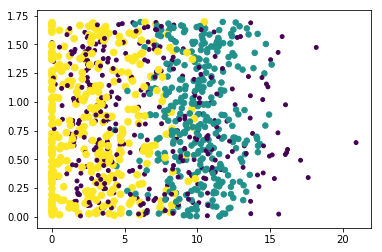

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2], 15.0 * np.array(datingLabels), 15.0 * np.array(datingLabels))
plt.show()

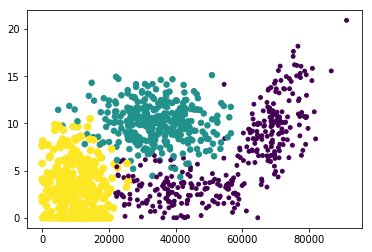

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 0], datingDataMat[:, 1], 15.0 * np.array(datingLabels), 15.0 * np.array(datingLabels))
plt.show()

## Normalizing dataset

In [19]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(dataSet.shape)
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

In [20]:
normMat, ranges, minVals = autoNorm(datingDataMat)

## Classification

In [31]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlable = labels[sortedDistIndicies[i]]
        classCount[voteIlable] = classCount.get(voteIlable, 0) + 1
    
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

## Test dataset

In [32]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3)
        print("The classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        
        if(classifierResult != datingLabels[i]):
            errorCount += 1.0
    print("Total error rate is: %f" % (errorCount / float(numTestVecs)))

In [33]:
datingClassTest()

The classifier came back with: 2, the real answer is: 2
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 2, the real answer is: 2
The classifier came back with: 2, the real answer is: 2
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 2, the real answer is: 2
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answe

## Application

In [38]:
def classifyPerson():
    reverseMapDict = { 1:'didntLike', 2:'largeDoses', 3:'smallDoses'}
    percentTats = float(input("Percentage of time spent playing video games?"))
    ffMiles = float(input("Frequent flier miles earned?"))
    iceCream = float(input("Liters of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = np.array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr-minVals)/ranges, normMat, datingLabels, 3)
    print("You will probably like this person:", reverseMapDict[classifierResult])

In [39]:
classifyPerson()

Percentage of time spent playing video games?10
Frequent flier miles earned?10000
Liters of ice cream consumed per year?0.5
You will probably like this person: smallDoses
